<a href="https://colab.research.google.com/github/vinybrasil/CiDAMO/blob/master/projeto_relmo/customers/3_apresentacao_RFM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:
#/content/drive/My Drive/projeto_relmo/clientes_RFM.csv
#/content/drive/My Drive/projeto_relmo/clientes_RFM_sem_mais_dia.csv
#/content/drive/My Drive/projeto_relmo/customers.csv
#/content/drive/My Drive/projeto_relmo/df_cliente_recibos_total.csv
#/content/drive/My Drive/projeto_relmo/DATA_SEMNA_SEMLIXO.csv      //é o data2

import pandas as pd
from sklearn.cluster import KMeans
import numpy as np
from matplotlib import pyplot as plt
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as shc
from scipy.cluster.hierarchy import linkage, dendrogram
import math
import datetime
import seaborn as sns

#fazer a média, histograma, sd do clientes_RFM.csv antes do K-MEANS e comparar com o método clássico
#tirar outliers?
#com ou sem o 1 dia a mais?
#fazer a média dos clusters


#referenciais:
#https://www.kaggle.com/jnikhilsai/rfm-clustering-of-customers-using-k-means
#https://github.com/joaolcorreia/RFM-analysis/blob/master/RFM%20Analysis.ipynb
#https://joaocorreia.io/blog/rfm-analysis-increase-sales-by-segmenting-your-customers.html
#https://cran.r-project.org/web/packages/rfm/vignettes/rfm-customer-level-data.html

In [4]:
data = pd.read_csv("/content/drive/My Drive/projeto_relmo/clientes_RFM_sem_mais_dia.csv")
data

,gente,frequêcia,monetario,recency
0,12346.0,2,0.00,325 days 02:33:00.000000000
1,12347.0,182,4386.15,1 days 20:58:00.000000000
2,12348.0,27,1476.24,74 days 23:37:00.000000000
3,12349.0,72,1461.76,18 days 02:59:00.000000000
4,12350.0,16,303.01,309 days 20:49:00.000000000
...,...,...,...,...
4358,18280.0,10,185.35,277 days 02:58:00.000000000
4359,18281.0,7,82.23,180 days 01:57:00.000000000
4360,18282.0,13,177.74,7 days 01:07:00.000000000
4361,18283.0,754,2114.73,3 days 00:48:00.000000000


In [5]:
data2 = data.drop('gente', axis=1)

In [11]:
data2.columns= ['frequência', 'monetário', 'recência']

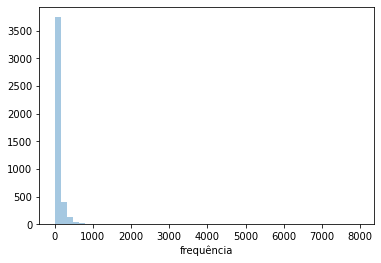

In [14]:
ax = sns.distplot(data2['frequência'], kde=False, hist=True)

In [17]:
max(data2['frequência'])

7971

In [18]:
min(data2['frequência'])

1

In [20]:
data2


,frequência,monetário,recência
0,2,0.00,325 days 02:33:00.000000000
1,182,4386.15,1 days 20:58:00.000000000
2,27,1476.24,74 days 23:37:00.000000000
3,72,1461.76,18 days 02:59:00.000000000
4,16,303.01,309 days 20:49:00.000000000
...,...,...,...
4358,10,185.35,277 days 02:58:00.000000000
4359,7,82.23,180 days 01:57:00.000000000
4360,13,177.74,7 days 01:07:00.000000000
4361,754,2114.73,3 days 00:48:00.000000000


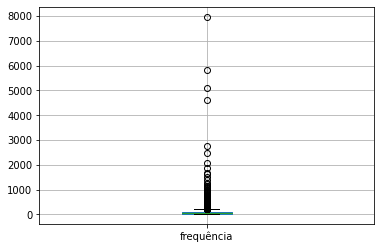

In [22]:
boxplot = data2.boxplot(column=['frequência'])

In [23]:
data2['frequência'].mean()

92.80517992207197

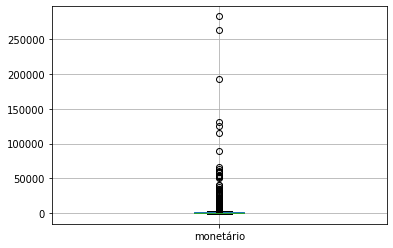

In [24]:
boxplot = data2.boxplot(column=['monetário'])

In [25]:
data2['monetário'].mean()

1928.899468255785

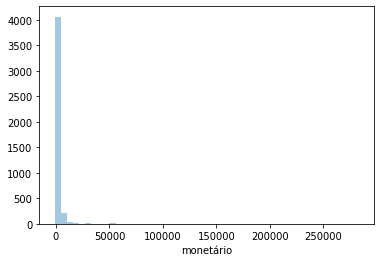

In [26]:
ax = sns.distplot(data2['monetário'], kde=False, hist=True)

In [61]:
#LUTANDO CONTRA O RECENCY


#RFM_norm1.Recency = RFM_norm1.Recency.dt.days
#data2.recência_arrumada = data2.recência.datetime
#strftime('%j')
#ax = sns.distplot(data2['recência'], kde=False, hist=True)

#dia = pd.to_datetime(data['recency'])
df_cliente_recibos

,Unnamed: 0,frequêcia,monetario,recency,difference
0,17850.0,2,0.00,326 days 02:33:00.000000000,374 days 04:24:00
1,13047.0,182,4386.15,2 days 20:58:00.000000000,374 days 04:24:00
2,12583.0,27,1476.24,75 days 23:37:00.000000000,374 days 04:24:00
3,13748.0,72,1461.76,19 days 02:59:00.000000000,374 days 04:24:00
4,15100.0,16,303.01,310 days 20:49:00.000000000,374 days 04:24:00
...,...,...,...,...,...
4358,13436.0,10,185.35,278 days 02:58:00.000000000,372 days 00:26:00
4359,15520.0,7,82.23,181 days 01:57:00.000000000,372 days 00:26:00
4360,13298.0,13,177.74,8 days 01:07:00.000000000,372 days 00:26:00
4361,14569.0,754,2114.73,4 days 00:48:00.000000000,372 days 00:26:00


In [ ]:

#dia = pd.to_datetime(df_cliente_recibos['difference'])
#dia = pd.to_datetime(df_cliente_recibos['recency'])

In [76]:
'''index_lixos = []
lixo = ["POST", "D", "C2", "M", "BANK CHARGES", "PADS", "DOT", "CRUK"]


#for item in lixo: ta errado aqui
  #for lixinho in data[data['StockCode'] == item]: 
for item in lixo:
  z = data_semlixo[data_semlixo['StockCode'] == item].index
  for lixinho in z:
    index_lixos.append(lixinho)
len(index_lixos)
data_semlixo2 = data_semlixo.drop(index=index_lixos, axis=0)
data_semlixo2'''

#a = df_cliente_recibos.groupby('Unnamed: 0')
#data2['recency'] = a.difference.min()


In [80]:
'''df_cliente_recibos = pd.read_csv("/content/drive/My Drive/projeto_relmo/df_cliente_recibos_total.csv")
dia = pd.to_datetime(data_semlixo2['InvoiceDate'])
maximum = max(dia)
maximum = maximum + pd.DateOffset(days=1)

df_cliente_recibos['difference'] = maximum - dia
a = df_cliente_recibos.groupby('Unnamed: 0')
a.difference.min()
d = a.difference.min().dt.days
data2['recency'] = d'''
#a = df_cliente_recibos.groupby('Unnamed: 0')
#d = a.difference.min().dt.days

In [ ]:
#d

In [85]:
data2['recency'] = d.values

In [88]:
data2['recency']

0       373
1       374
2       374
3       372
4       373
       ... 
4358    373
4359    372
4360    372
4361    374
4362    373
Name: recency, Length: 4363, dtype: int64

In [56]:
df_cliente_recibos

,Unnamed: 0,frequêcia,monetario,recency,difference
0,17850.0,2,0.00,326 days 02:33:00.000000000,374 days 04:24:00
1,13047.0,182,4386.15,2 days 20:58:00.000000000,374 days 04:24:00
2,12583.0,27,1476.24,75 days 23:37:00.000000000,374 days 04:24:00
3,13748.0,72,1461.76,19 days 02:59:00.000000000,374 days 04:24:00
4,15100.0,16,303.01,310 days 20:49:00.000000000,374 days 04:24:00
...,...,...,...,...,...
4358,13436.0,10,185.35,278 days 02:58:00.000000000,372 days 00:26:00
4359,15520.0,7,82.23,181 days 01:57:00.000000000,372 days 00:26:00
4360,13298.0,13,177.74,8 days 01:07:00.000000000,372 days 00:26:00
4361,14569.0,754,2114.73,4 days 00:48:00.000000000,372 days 00:26:00


In [95]:
valores = []
z = 0
while z < len(df_cliente_recibos):
  dia = df_cliente_recibos['recency'][z]
  dia_arrumado = dia.split(" ", 1)
  valores.append(dia_arrumado[0])
  z += 1
len(valores)

4363

In [ ]:
valores

In [97]:
data2['dias desde última compra'] = valores

In [103]:
data2

,frequência,monetário,recência,recency,dias desde última compra
0,2,0.00,325 days 02:33:00.000000000,373,326
1,182,4386.15,1 days 20:58:00.000000000,374,2
2,27,1476.24,74 days 23:37:00.000000000,374,75
3,72,1461.76,18 days 02:59:00.000000000,372,19
4,16,303.01,309 days 20:49:00.000000000,373,310
...,...,...,...,...,...
4358,10,185.35,277 days 02:58:00.000000000,373,278
4359,7,82.23,180 days 01:57:00.000000000,372,181
4360,13,177.74,7 days 01:07:00.000000000,372,8
4361,754,2114.73,3 days 00:48:00.000000000,374,4


In [99]:
data['recência'] = valores

In [101]:
data3 = data.drop('recency', axis=1)

In [ ]:
data3

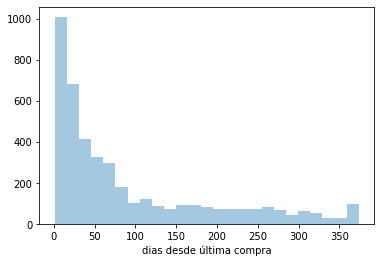

In [104]:
ax = sns.distplot(data2['dias desde última compra'], kde=False, hist=True)

KeyError: ignored

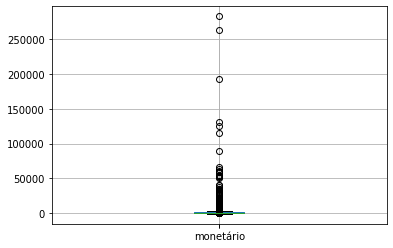

In [113]:
for columns in data2.columns:
  boxplot = data2.boxplot(column=columns)

In [111]:
data2.columns

Index(['frequência', 'monetário', 'recência', 'recency',
       'dias desde última compra'],
      dtype='object')

TypeError: ignored

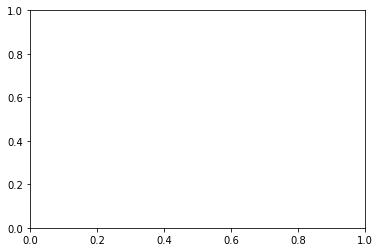

In [116]:
plt.boxplot(valores)

In [120]:
df = pd.DataFrame(valores,columns=valores)

df.boxplot(columns=valores)

ValueError: ignored

In [118]:
df

,0
0,326
1,2
2,75
3,19
4,310
...,...
4358,278
4359,181
4360,8
4361,4


In [123]:
data2

,frequência,monetário,recência,recency,dias desde última compra
0,2,0.00,325 days 02:33:00.000000000,373,326
1,182,4386.15,1 days 20:58:00.000000000,374,2
2,27,1476.24,74 days 23:37:00.000000000,374,75
3,72,1461.76,18 days 02:59:00.000000000,372,19
4,16,303.01,309 days 20:49:00.000000000,373,310
...,...,...,...,...,...
4358,10,185.35,277 days 02:58:00.000000000,373,278
4359,7,82.23,180 days 01:57:00.000000000,372,181
4360,13,177.74,7 days 01:07:00.000000000,372,8
4361,754,2114.73,3 days 00:48:00.000000000,374,4


In [124]:
data3 = data2.drop(['recência', 'recency'], axis=1)

In [125]:
data3

,frequência,monetário,dias desde última compra
0,2,0.00,326
1,182,4386.15,2
2,27,1476.24,75
3,72,1461.76,19
4,16,303.01,310
...,...,...,...
4358,10,185.35,278
4359,7,82.23,181
4360,13,177.74,8
4361,754,2114.73,4


In [126]:
data3['recency'] = data3['dias desde última compra'].astype(int)

In [128]:
data3 = data3.drop('dias desde última compra', axis=1)

In [129]:
data3

,frequência,monetário,recency
0,2,0.00,326
1,182,4386.15,2
2,27,1476.24,75
3,72,1461.76,19
4,16,303.01,310
...,...,...,...
4358,10,185.35,278
4359,7,82.23,181
4360,13,177.74,8
4361,754,2114.73,4


In [130]:
#removendo outliers

Q1 = data3.monetário.quantile(0.25)
Q3 = data3.monetário.quantile(0.75)
IQR = Q3 - Q1
data3 = data3[(data3.monetário >= (Q1 - 1.5*IQR)) & (data3.monetário <= (Q3 + 1.5*IQR))]

In [131]:
Q1 = data3.recency.quantile(0.25)
Q3 = data3.recency.quantile(0.75)
IQR = Q3 - Q1
data3 = data3[(data3.recency >= (Q1 - 1.5*IQR)) & (data3.recency <= (Q3 + 1.5*IQR))]

In [132]:
Q1 = data3.frequência.quantile(0.25)
Q3 = data3.frequência.quantile(0.75)
IQR = Q3 - Q1
data3 = data3[(data3.frequência >= (Q1 - 1.5*IQR)) & (data3.frequência <= (Q3 + 1.5*IQR))]

In [133]:
data3

,frequência,monetário,recency
0,2,0.00,326
2,27,1476.24,75
3,72,1461.76,19
4,16,303.01,310
5,84,1285.11,36
...,...,...,...
4357,9,175.41,74
4358,10,185.35,278
4359,7,82.23,181
4360,13,177.74,8


In [135]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
data4 = data3.copy()
data4 = scaler.fit_transform(data4)
data4

array([[0.00552486, 0.18879342, 0.89779006],
       [0.14364641, 0.52136829, 0.20441989],
       [0.39226519, 0.51810616, 0.04972376],
       ...,
       [0.03314917, 0.20731861, 0.49723757],
       [0.06629834, 0.22883559, 0.01933702],
       [0.38121547, 0.60761644, 0.1160221 ]])

1
2
3
4
5
6
7
8
9
10
11
12
13
14


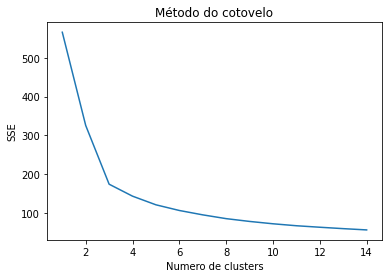

<Figure size 432x288 with 0 Axes>

In [138]:
#X = data4.to_numpy()
wcss = []
for i in range(1, 15):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=25, random_state=0)
    kmeans.fit(data4)
    wcss.append(kmeans.inertia_)
    print(i)
plt.plot(range(1, 15), wcss)
plt.title('Método do cotovelo')
plt.xlabel('Numero de clusters')
plt.ylabel('SSE')
plt.show()
plt.savefig("/content/drive/My Drive/projeto_relmo/novo_kmeans.png")

In [139]:
def optimal_number_of_clusters(wcss):
    x1, y1 = 2, wcss[0]
    x2, y2 = 20, wcss[len(wcss)-1]

    distances = []
    for i in range(len(wcss)):
        x0 = i+2
        y0 = wcss[i]
        numerator = abs((y2-y1)*x0 - (x2-x1)*y0 + x2*y1 - y2*x1)
        denominator = math.sqrt((y2 - y1)**2 + (x2 - x1)**2)
        distances.append(numerator/denominator)
    
    return distances.index(max(distances)) + 2
n = optimal_number_of_clusters(wcss)
kmeans = KMeans(n_clusters=n, init='k-means++', max_iter=600, n_init=25, random_state=0)
kmeans.fit(X)
y = kmeans.predict(X)
n

5

In [140]:

from sklearn.metrics import silhouette_score
sse_ = []
for k in range(2, 15):
    kmeans = KMeans(n_clusters=k).fit(data4)
    sse_.append([k, silhouette_score(data4, kmeans.labels_)])



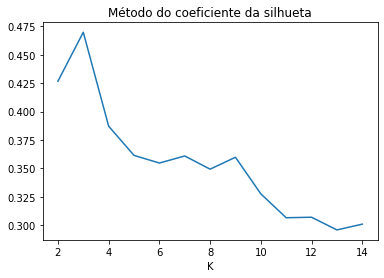

In [142]:
plt.title('Método do coeficiente da silhueta')
plt.xlabel('K')
plt.plot(pd.DataFrame(sse_)[0], pd.DataFrame(sse_)[1]);



In [143]:
kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=600, n_init=25, random_state=0)
kmeans.fit(X)
y = kmeans.predict(X)

In [144]:
data3['predito'] = y

In [145]:
data3

,frequência,monetário,recency,predito
0,2,0.00,326,0
2,27,1476.24,75,2
3,72,1461.76,19,2
4,16,303.01,310,0
5,84,1285.11,36,2
...,...,...,...,...
4357,9,175.41,74,0
4358,10,185.35,278,0
4359,7,82.23,181,0
4360,13,177.74,8,0


In [146]:
data3['predito'].value_counts()

0    2378
2     892
1     360
Name: predito, dtype: int64

In [148]:
a = data3.groupby('predito').monetário.mean()


In [149]:
a

predito
0     359.153970
1    2579.516972
2    1248.724058
Name: monetário, dtype: float64

In [150]:
a = data3.groupby('predito').frequência.mean()
a

predito
0     29.994113
1    109.722222
2     70.598655
Name: frequência, dtype: float64

In [151]:
a = data3.groupby('predito').recency.mean()

In [152]:
a

predito
0    119.306140
1     44.269444
2     62.866592
Name: recency, dtype: float64

In [153]:
df = pd.DataFrame(data3.groupby('predito').frequência.mean().values, columns=["Frequência Média"])

In [154]:
df['Recência Média'] = data3.groupby('predito').recency.mean().values

In [155]:
df['Gasto médio'] = data3.groupby('predito').monetário.mean().values

In [156]:
df

,Frequência Média,Recência Média,Gasto médio
0,29.994113,119.306140,359.153970
1,109.722222,44.269444,2579.516972
2,70.598655,62.866592,1248.724058


In [157]:
df.round(2)

,Frequência Média,Recência Média,Gasto médio
0,29.99,119.31,359.15
1,109.72,44.27,2579.52
2,70.60,62.87,1248.72


Text(0, 0.5, 'Frequência média')

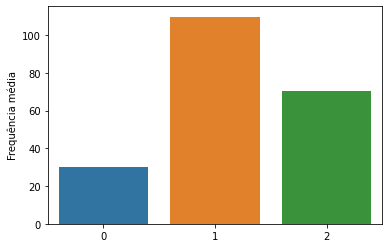

In [177]:
import matplotlib.pyplot as plt

#fig= plt.figure(figsize=(10,8))
df.columns = ['frequencia', 'recencia', 'gasto']
sns.barplot(df.index,df.frequencia)
plt.ylabel("Frequência média")

Text(0, 0.5, 'Recência média')

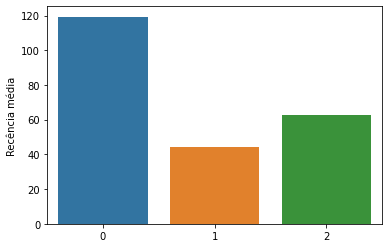

In [178]:
#fig= plt.figure(figsize=(10,8))
sns.barplot(df.index,df.recencia)

plt.ylabel("Recência média")

Text(0, 0.5, 'Gasto médio')

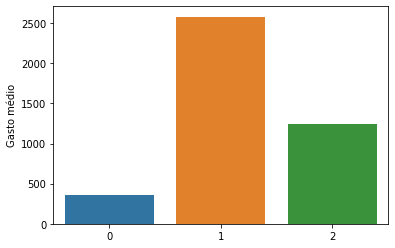

In [179]:
#fig= plt.figure(figsize=(10,8))
sns.barplot(df.index,df.gasto)

plt.ylabel("Gasto médio")

In [173]:
data2

,frequência,monetário,recência,recency,dias desde última compra
0,2,0.00,325 days 02:33:00.000000000,373,326
1,182,4386.15,1 days 20:58:00.000000000,374,2
2,27,1476.24,74 days 23:37:00.000000000,374,75
3,72,1461.76,18 days 02:59:00.000000000,372,19
4,16,303.01,309 days 20:49:00.000000000,373,310
...,...,...,...,...,...
4358,10,185.35,277 days 02:58:00.000000000,373,278
4359,7,82.23,180 days 01:57:00.000000000,372,181
4360,13,177.74,7 days 01:07:00.000000000,372,8
4361,754,2114.73,3 days 00:48:00.000000000,374,4


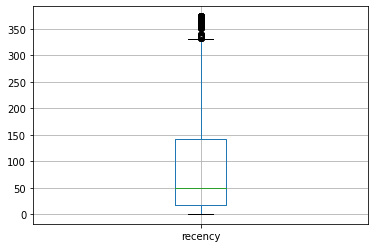

In [176]:
data2['recency'] = data2['dias desde última compra'].astype(int)
boxplot = data2.boxplot(column=['recency'])

In [180]:
data2.recency.mean()

92.15471006188403

In [182]:
data3

,frequência,monetário,recency,predito
0,2,0.00,326,2
2,27,1476.24,75,4
3,72,1461.76,19,4
4,16,303.01,310,2
5,84,1285.11,36,4
...,...,...,...,...
4357,9,175.41,74,2
4358,10,185.35,278,2
4359,7,82.23,181,2
4360,13,177.74,8,2


In [181]:
kmeans = KMeans(n_clusters=5, init='k-means++', max_iter=600, n_init=25, random_state=0)
kmeans.fit(X)
y = kmeans.predict(X)
data3['predito'] = y
data3['predito'].value_counts()

2    1644
0     929
4     540
1     329
3     188
Name: predito, dtype: int64

In [184]:
a = data3.groupby('predito').monetário.mean()
a

predito
0     675.418105
1    1980.754134
2     242.201509
3    2939.431117
4    1234.504167
Name: monetário, dtype: float64

In [185]:
a = data3.groupby('predito').frequência.mean()
a

predito
0     51.595264
1     92.386018
2     21.475669
3    117.808511
4     70.405556
Name: frequência, dtype: float64

In [187]:
a = data3.groupby('predito').recency.mean()
a

predito
0     81.130248
1     49.793313
2    135.398418
3     39.606383
4     62.835185
Name: recency, dtype: float64

In [188]:
df = pd.DataFrame(data3.groupby('predito').frequência.mean().values, columns=["Frequência Média"])

In [189]:
df['Recência Média'] = data3.groupby('predito').recency.mean().values

In [190]:
df['Gasto médio'] = data3.groupby('predito').monetário.mean().values

In [192]:
df.round(2)

,Frequência Média,Recência Média,Gasto médio
0,51.60,81.13,675.42
1,92.39,49.79,1980.75
2,21.48,135.40,242.20
3,117.81,39.61,2939.43
4,70.41,62.84,1234.50


In [193]:
df.columns = ['frequencia', 'recencia', 'gasto']

Text(0, 0.5, 'Gasto médio')

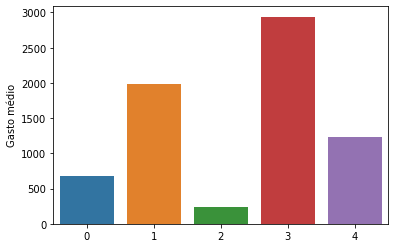

In [194]:
sns.barplot(df.index,df.gasto)

plt.ylabel("Gasto médio")

Text(0, 0.5, 'Frequência')

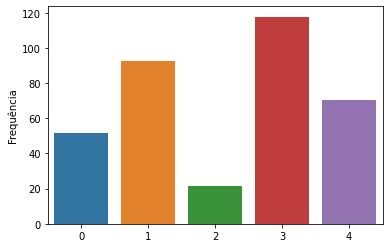

In [195]:
sns.barplot(df.index,df.frequencia)

plt.ylabel("Frequência")

Text(0, 0.5, 'Recência')

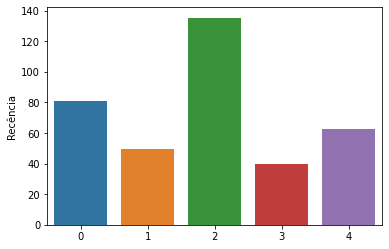

In [197]:
sns.barplot(df.index,df.recencia)

plt.ylabel("Recência")

In [199]:
for item in data3['predito'].value_counts().values:
  print(round((item/data3['predito'].value_counts().sum())*100,2), "%")

45.29 %
25.59 %
14.88 %
9.06 %
5.18 %


In [200]:
kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=600, n_init=25, random_state=0)
kmeans.fit(X)
y = kmeans.predict(X)
data3['predito'] = y
data3['predito'].value_counts()
for item in data3['predito'].value_counts().values:
  print(round((item/data3['predito'].value_counts().sum())*100,2), "%")

65.51 %
24.57 %
9.92 %


In [201]:
for item in [2378, 892, 360]:
  print(round((item/3630)*100,2),"%")

65.51 %
24.57 %
9.92 %
